In [1]:
#imported basic library required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv("train.csv")   # training set file

In [3]:
train_copy=pd.read_csv("train.csv") # keeping a copy of train data

In [4]:
test=pd.read_csv("test.csv")    # test set file

In [5]:
submit=pd.read_csv("gender_submission.csv")  # file we need to submmit on kaggle

In [6]:
submit.head()  #cheacking to 5 row

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
test.head() #cheacking to 5 row

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train.head() ##cheacking to 5 row

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#working on train data

In [10]:
train.describe()  # age column is having plenty of missing value.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train.info() #lot of missing value in cabin and age column, got data type of all the columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
train['Age'].isnull().sum() # got 177 null value of Age

177

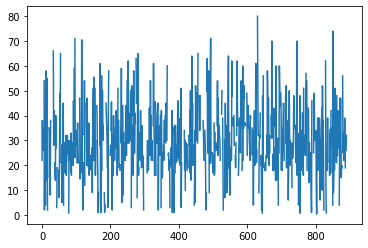

In [13]:
plt.plot(train['Age'])  # plot age vs count plot

In [14]:
mean_age= train['Age'].mean()

In [15]:
mean_age # we got mean of age 

29.69911764705882

In [16]:
train['Age'].fillna(mean_age, inplace=True)  # replacing all the null value with mean. will not loose data.

In [17]:
train['Age'].isnull().sum() # cheacking number of null.

0

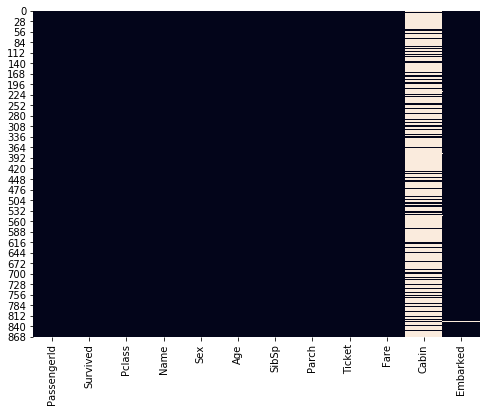

In [18]:
plt.figure(figsize=(8,6))                    # cheakig all the null values of the columns.., 
sns.heatmap(train.isnull(),cbar=False)        #found cabin column have lot of null values.

In [19]:
train.drop('Cabin', axis=1) # since cabin columns has null values.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


0    549
Name: Survived, dtype: int64
1    342
Name: Survived, dtype: int64


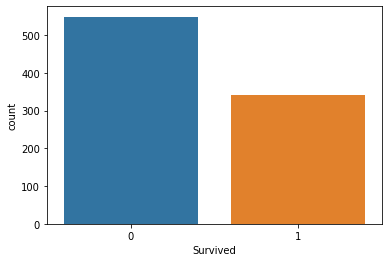

In [20]:
sns.countplot(x='Survived',data=train)                          # number of passanger survive not survive
print(train['Survived'][(train['Survived']==0)].value_counts())
print(train['Survived'][(train['Survived']==1)].value_counts())

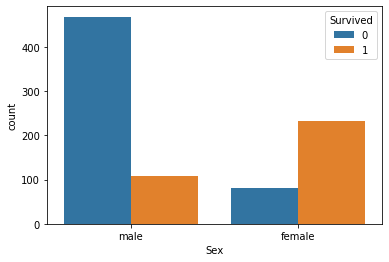

In [21]:
sns.countplot(x='Sex',hue='Survived',data=train) # number of male and female passanger survived and not survived

In [22]:
m_f_s=train.groupby(['Sex','Survived'])['Survived'].count()

In [23]:
m_f_s     # count of male and female survive and not survive

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

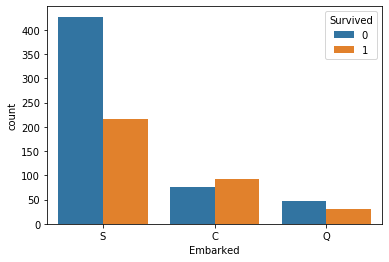

In [24]:
sns.countplot(x='Embarked',hue='Survived',data=train) # number of passanger survived,not survived w.r.t Embarked.

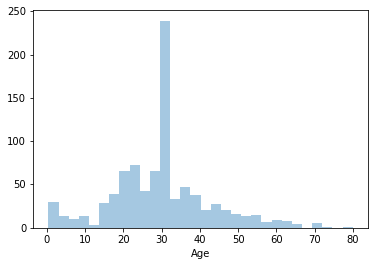

In [25]:
age1=train['Age']
sns.distplot(age1,bins=30,kde=False)

In [26]:
feature=['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

In [27]:
train1=train[feature]

In [28]:
train1.head()   # not included the column PassengerId,Name,Ticket.. in feature dataset.

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [29]:
train1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [30]:
train1['Embarked'].isnull().sum()

2

In [31]:
train1.dropna(inplace=True)

In [32]:
train1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [33]:
df_embark_one=pd.get_dummies(train1['Embarked'],prefix='embarked')

In [34]:
df_embark_one

,embarked_C,embarked_Q,embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [35]:
df_male=pd.get_dummies(train1['Sex'],prefix='sex')

In [36]:
df_male

,sex_female,sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [37]:
df_pclass=pd.get_dummies(train1['Pclass'],prefix='pclass')

In [38]:
df_pclass

,pclass_1,pclass_2,pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [39]:
train2=pd.concat([train1,df_embark_one,df_male,df_pclass],axis=1)
train2.drop(['Sex','Pclass','Embarked'],axis=1,inplace=True)

In [40]:
train2

,Survived,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,22.000000,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.000000,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.000000,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,35.000000,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,0,0,1,0,1,0,1,0
887,1,19.000000,0,0,30.0000,0,0,1,1,0,1,0,0
888,0,29.699118,1,2,23.4500,0,0,1,1,0,0,0,1
889,1,26.000000,0,0,30.0000,1,0,0,0,1,1,0,0


In [41]:
# Start building machine learning model

In [42]:
#split the data into feature and target
x_train=train2.drop('Survived',axis=1)
y_train=train2.Survived

In [43]:
y_train.shape                 # 889 rows and 1 column

(889,)

In [44]:
x_train.shape                # 889 rows and 7 column

(889, 12)

# defining function to fit machine learning model

In [45]:
#import all necessory library
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

In [46]:
def fit_ml_algo(algo,x_train,y_train,cv):
    model=algo.fit(x_train,y_train)
    acc=round(model.score(x_train,y_train)*100,2) # calculating the accuracy score before cv
    
    train_pred=cross_val_predict(algo,x_train,y_train,cv=cv,n_jobs=-1) # predicting the train after cross validation
    
    acc_cv=round(metrics.accuracy_score(y_train, train_pred)*100,2)   # accuracy score after performing croos validation
    
    return(train_pred,acc,acc_cv)
    

In [47]:
# random forest

train_pred_rand,acc_rand,acc_cv_rand= fit_ml_algo(RandomForestClassifier(),x_train,y_train,10)
print("accuracy ", acc_rand)
print("accuracy after 10 fold", acc_cv_rand)

accuracy  96.51
accuracy after 10 fold 80.65


In [48]:
# logistic Regression

train_pred_log,acc_log,acc_cv_log= fit_ml_algo(LogisticRegression(),x_train,y_train,10)
print("accuracy ", acc_log)
print("accuracy after 10 fold", acc_cv_log)


accuracy  80.43
accuracy after 10 fold 79.98


In [49]:
# GradientBoostingClassifier 

train_pred_gbc,acc_gbc,acc_cv_gbc= fit_ml_algo(GradientBoostingClassifier(),x_train,y_train,10)
print("accuracy ", acc_gbc)
print("accuracy after 10 fold", acc_cv_gbc)


accuracy  89.2
accuracy after 10 fold 83.13


In [50]:
# k nearest neighbour
train_pred_knn,acc_knn,acc_cv_knn= fit_ml_algo(KNeighborsClassifier(),x_train,y_train,10)
print("accuracy ", acc_knn)
print("accuracy after 10 fold", acc_cv_knn)

accuracy  82.11
accuracy after 10 fold 71.09


In [51]:
# Decision Tree Classifier

train_pred_dtc,acc_dtc,acc_cv_dtc= fit_ml_algo(DecisionTreeClassifier(),x_train,y_train,10)
print("accuracy ", acc_dtc)
print("accuracy after 10 fold", acc_cv_dtc)

accuracy  98.2
accuracy after 10 fold 77.62


In [52]:
# Naive Bayes

train_pred_nb,acc_nb,acc_cv_nb= fit_ml_algo(GaussianNB(),x_train,y_train,10)
print("accuracy ", acc_nb)
print("accuracy after 10 fold", acc_cv_nb)

accuracy  78.52
accuracy after 10 fold 78.4


In [53]:
cv_models=pd.DataFrame({'model':['logistic Regression', 'random forest','GradientBoostingClassifier','k nearest neighbour','Decision Tree Classifier',
                        'Naive Bayes'],'score':[acc_cv_log,acc_cv_rand,acc_cv_gbc,acc_cv_knn,acc_cv_dtc,acc_cv_nb]})

In [54]:
cv_models.sort_values(by='score',ascending=False)     #we can clearly see that GradientBoostingClassifier is having highest 
                                                      # accuracy score after 10 fold

,model,score
2,GradientBoostingClassifier,83.13
1,random forest,80.65
0,logistic Regression,79.98
5,Naive Bayes,78.40
4,Decision Tree Classifier,77.62
3,k nearest neighbour,71.09


# using Gradient bost classifier to do analysis on test data

In [55]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [56]:
# inorder to feed model both test and x_train data should have similar column

In [57]:
df_embark_one=pd.get_dummies(test['Embarked'],prefix='embarked')
df_male=pd.get_dummies(test['Sex'],prefix='sex')
df_pclass=pd.get_dummies(test['Pclass'],prefix='pclass')

In [58]:
test=pd.concat([test,df_embark_one,df_male,df_pclass],axis=1)
test.drop(['Sex','Pclass','Embarked'],axis=1,inplace=True)

In [59]:
x_train.head()

,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,0,0,1,1,0,1,0,0
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [60]:
column=x_train.columns
column

Index(['Age', 'SibSp', 'Parch', 'Fare', 'embarked_C', 'embarked_Q',
       'embarked_S', 'sex_female', 'sex_male', 'pclass_1', 'pclass_2',
       'pclass_3'],
      dtype='object')

In [61]:
test.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,0,1,0,0,1,0,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,0,0,1,1,0,0,0,1
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,0,1,0,0,1,0,1,0
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,0,0,1,0,1,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,0,0,1,1,0,0,0,1


In [62]:
test['Age'].fillna(mean_age, inplace=True)

In [76]:
test['Fare'].fillna(8.66,inplace=True)

In [77]:
test[column].isnull().sum()

Age           0
SibSp         0
Parch         0
Fare          0
embarked_C    0
embarked_Q    0
embarked_S    0
sex_female    0
sex_male      0
pclass_1      0
pclass_2      0
pclass_3      0
dtype: int64

In [78]:
# now both are having same feature

In [79]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=50, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(x_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(x_train, y_train)))
 

Learning rate:  0.05
Accuracy score (training): 0.816
Learning rate:  0.075
Accuracy score (training): 0.813
Learning rate:  0.1
Accuracy score (training): 0.820
Learning rate:  0.25
Accuracy score (training): 0.840
Learning rate:  0.5
Accuracy score (training): 0.855
Learning rate:  0.75
Accuracy score (training): 0.859
Learning rate:  1
Accuracy score (training): 0.859


In [80]:
 gb_clf = GradientBoostingClassifier(n_estimators=50, learning_rate=0.75, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.75, loss='deviance', max_depth=2,
                           max_features=2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [81]:
predict=gb_clf.predict(test[column])

In [82]:
predict

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [83]:
# saving the predicted value in submission file

In [84]:
Submission=pd.DataFrame()

In [85]:
Submission['PassengerId']=test['PassengerId']

In [87]:
Submission['Survived']=predict

In [92]:
Submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [94]:
Submission.to_csv('kaggle_submission.csv', index=False)

In [95]:
Submission_check=pd.read_csv('kaggle_submission.csv')

In [96]:
Submission_check

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
